In [1]:
import glob
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

from PIL import Image # pip install Pillow
import time
import math
import numpy as np
import scipy
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt

from morselib import *

Using TensorFlow backend.


[0 0 0 ... 5 5 5]


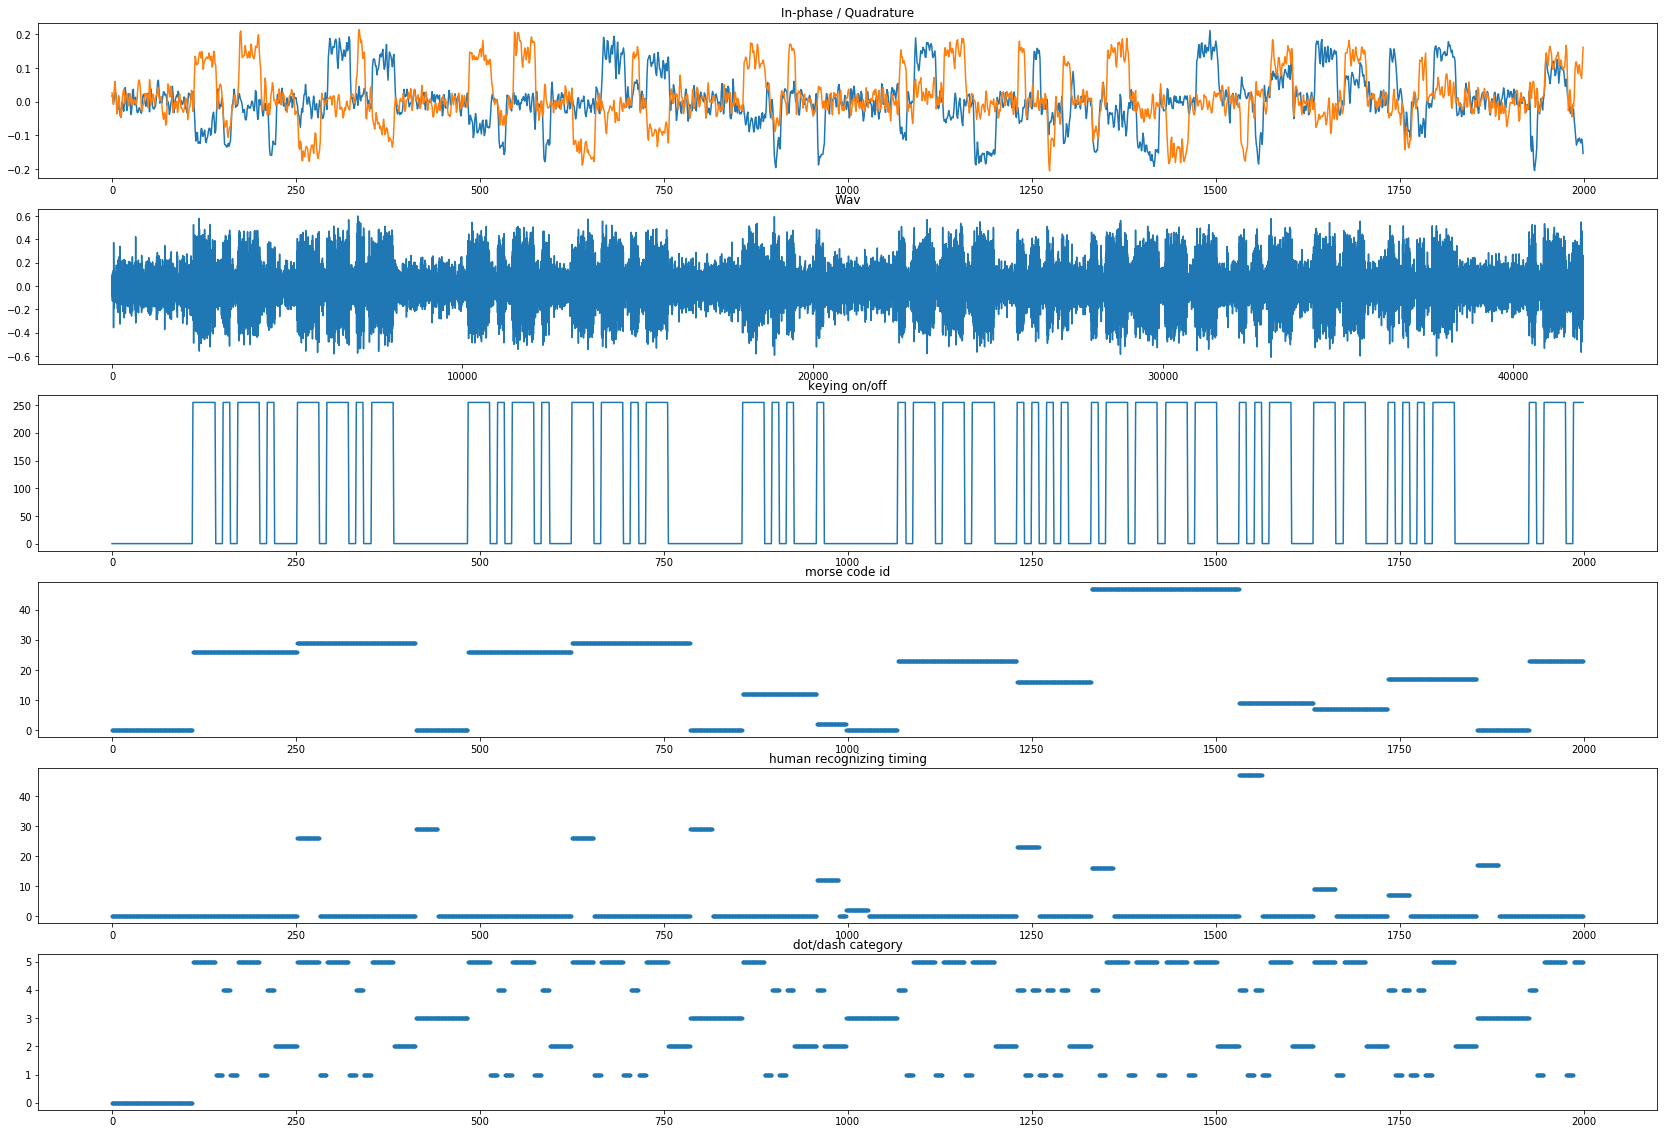

In [7]:
start = 100
end = start+2000

result_samplerate = 210

# load ./samples/10dB-25wpm-600Hz.ogg and ./samples/10dB-25wpm-600Hz-keying.png
wav_data = MorseWavData.load("./samples/10dB-25wpm-600Hz.ogg")
down_sampling_factor = math.floor(wav_data.samplerate / result_samplerate)

ch0, ch1, key, mid, rht, ddt = (d[start:end] for d in wav_data.get_iq(rsr = result_samplerate))
print(ddt)

plt.figure(figsize=(29,20))
plt.subplot(611)
plt.title('In-phase / Quadrature')
plt.plot(ch0)
plt.plot(ch1)
plt.subplot(612)
plt.title('Wav')
plt.plot(wav_data.wav[start*down_sampling_factor:end*down_sampling_factor])
plt.subplot(613)
plt.title('keying on/off')
plt.plot(key)
plt.subplot(614)
plt.title('morse code id')
plt.plot(mid, '.')
plt.subplot(615)
plt.title('human recognizing timing')
plt.plot(rht, '.')
plt.subplot(616)
plt.title('dot/dash category')
plt.plot(ddt, '.')
plt.show()

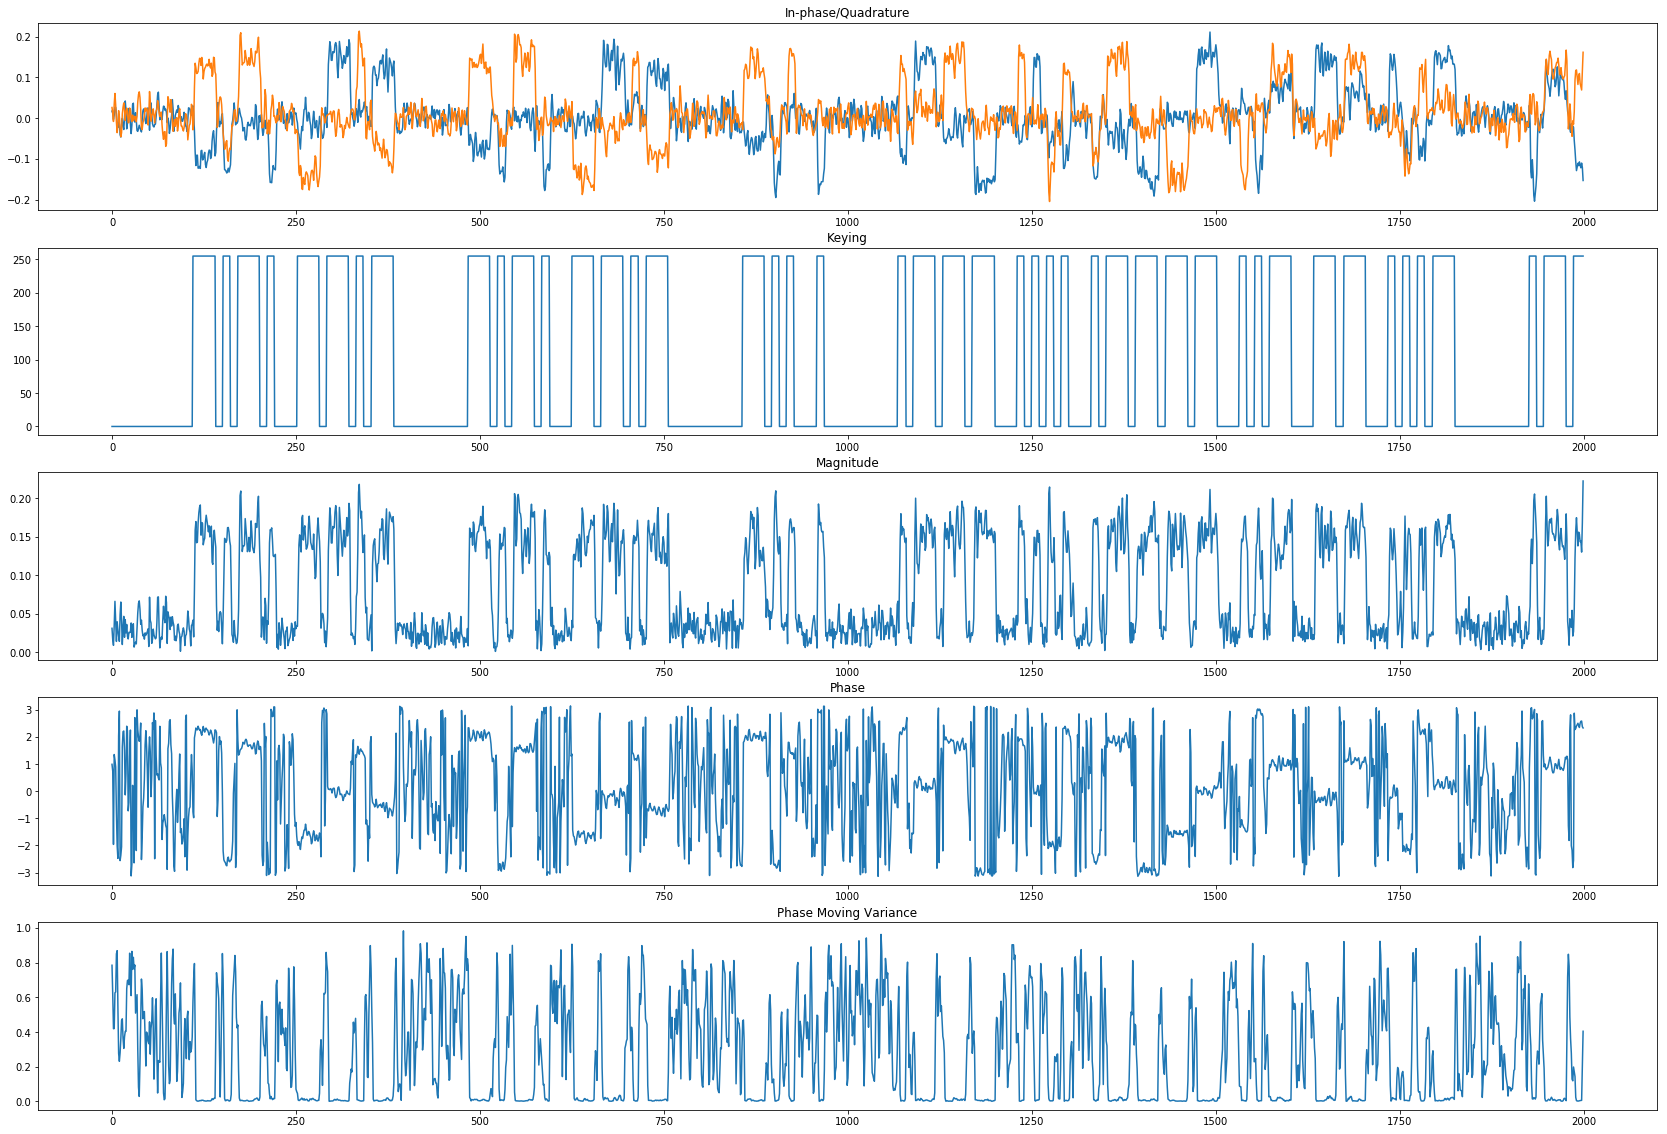

In [8]:
# convert I/Q signal to vector
iq = ch0 + ch1 * 1j

# absolute is magunitude
mag = np.absolute(iq)
# angle is phase
pha = np.angle(iq)

# calculate angle variance by moving average with unit vectors
var_len = 5
var = np.absolute(np.convolve( iq / mag, np.ones(var_len) / var_len, mode='same'))

plt.figure(figsize=(29,20))
plt.subplot(511)
plt.title('In-phase/Quadrature')
plt.plot(ch0)
plt.plot(ch1)
plt.subplot(512)
plt.title('Keying')
plt.plot(key)
plt.subplot(513)
plt.title('Magnitude')
plt.plot(  mag )
plt.subplot(514)
plt.title('Phase')
plt.plot(  pha   )
plt.subplot(515)
plt.title('Phase Moving Variance')
plt.plot( 1 - var  )

plt.show()